Notebook for testing whether I can convert CCDC molecule objects to RDKit

Mpro

In [7]:
from ccdc.docking import Docker
from ccdc.io import MoleculeReader, EntryReader

docker = Docker()
settings = docker.settings

mpro_dir = '/Users/williammccorkindale/ml_physics/PhD_data/FRESCO/Apo_Mpro_6YB7'

mpro_protein_file = f'{mpro_dir}/6LU7_protein.mol2'
settings.add_protein_file(mpro_protein_file)

mpro_native_ligand_file = f'{mpro_dir}/6LU7_ligand.mol2'
mpro_native_ligand = MoleculeReader(mpro_native_ligand_file)[0]
print(mpro_native_ligand.smiles)
mpro_protein = settings.proteins[0]
settings.binding_site = settings.BindingSiteFromLigand(mpro_protein, mpro_native_ligand, 8.0)

settings.fitness_function = 'plp'
settings.autoscale = 10.
settings.early_termination = False

import tempfile
batch_tempd = tempfile.mkdtemp()
settings.output_directory = '/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/results/'
settings.output_file = 'docked_ligands.mol2'

mpro_frag_file = '/Users/williammccorkindale/ml_physics/PhD_data/FRESCO/x0072.mol2'
# mpro_frag = MoleculeReader(mpro_frag_file)[0]
# settings.add_ligand_file(mpro_frag_file, 5)

ligand_prep = docker.LigandPreparation()
prepared_lig = ligand_prep.prepare(EntryReader(mpro_frag_file)[0])
results = docker.dock() 
print(results.return_code)

from ccdc.io import MoleculeWriter
with MoleculeWriter('prepared_lig.mol2') as mol_writer:
    mol_writer.write(prepared_lig.molecule)


CC(C)CC(NC(=O)C(NC(=O)C(C)NC(=O)C1=NOC(=C1)C)C(C)C)C(=O)NC(CC1CCNC1=O)[C]=CC(=O)OCc1ccccc1
Starting GOLD with conf file /Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/api_gold.conf
Setting up GOLD environment...
GOLD Version 2022.1.0
Running:
 
     "/Applications/CCDC/Discovery_2022/GOLD/gold/d_macx/bin/gold_macx" "/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/api_gold.conf"

0


In [8]:
ligands = results.ligands
print(len(ligands))
# print(dir(results))
# print(ligands[0].molecule.to_string())

100


In [10]:
print(ligands[0].fitness())

52.4742


In [4]:
for mol in MoleculeReader(mpro_frag_file):
    print(mol.smiles)

CS(=O)(=O)NCCc1ccccc1


In [5]:
from rdkit.Chem.rdmolfiles import MolFromMol2File

rdkit_mol = MolFromMol2File('/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/results/ranked_x0072_m1_1.mol2')

INFO:rdkit:Enabling RDKit 2022.03.2 jupyter extensions


CS(=O)(=O)NCCc1ccccc1


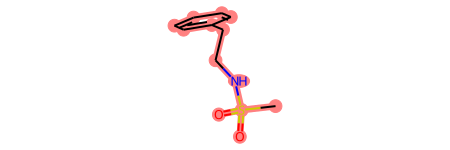

In [6]:
from rdkit.Chem import MolToSmiles, MolFromSmiles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolfiles import MolFromMol2Block

rdkit_mol = MolFromMol2Block(ligands[2].molecule.to_string())
mol_from_smiles_file = MolFromSmiles('CS(=O)(=O)NCCC=1C=CC=CC1')
ref_mol = AllChem.AssignBondOrdersFromTemplate(mol_from_smiles_file, rdkit_mol)

print(MolToSmiles(ref_mol))
ref_mol